In [116]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [72]:
#loading data 
df=pd.read_csv("E:\\Users\\GEONIX\\Downloads\\AB_NYC_2019.csv")
#clean and convert types
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)
df['last_review']=pd.to_datetime(df['last_review'])

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\GEONIX\AppData\Local\Temp\ipykernel_13736\3949240875.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)


In [76]:
#missing values 
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [78]:
#drop duplicates 
df=df.drop_duplicates(subset='id')

In [80]:
#explore structure
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
df.describe(include='all')

(3999, 16)
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object
id                                  0
name                                2
host_id                             0
host_name                           2
neighbourhood_group                 0
n

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.999000e+03,3997,3.999000e+03,3997,3999,3999,3999.000000,3999.000000,3999,3999.000000,3999.000000,3999.000000,3662,3999.000000,3999.000000,3999.000000
unique,NaN,3970,NaN,1916,5,141,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Loft Suite @ The Box House Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,34,1889,411,NaN,NaN,2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.057443e+06,NaN,3.996926e+06,NaN,NaN,NaN,40.728834,-73.961358,NaN,177.095524,8.980995,61.522381,2018-06-18 10:03:36.275259648,0.847147,2.318080,150.313078
min,2.539000e+03,NaN,2.571000e+03,NaN,NaN,NaN,40.508680,-74.239860,NaN,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,4.047125e+05,NaN,9.239150e+05,NaN,NaN,NaN,40.689330,-73.984940,NaN,83.000000,2.000000,7.000000,2018-01-01 00:00:00,0.110000,1.000000,0.000000
50%,8.822580e+05,NaN,2.862643e+06,NaN,NaN,NaN,40.723460,-73.961110,NaN,125.000000,3.000000,28.000000,2019-05-06 00:00:00,0.420000,1.000000,137.000000
75%,1.747619e+06,NaN,6.486116e+06,NaN,NaN,NaN,40.761630,-73.945400,NaN,195.000000,5.000000,86.000000,2019-06-21 00:00:00,1.200000,2.000000,283.000000
max,2.508374e+06,NaN,1.731875e+07,NaN,NaN,NaN,40.908040,-73.733230,NaN,6500.000000,1000.000000,607.000000,2019-07-08 00:00:00,10.000000,52.000000,365.000000


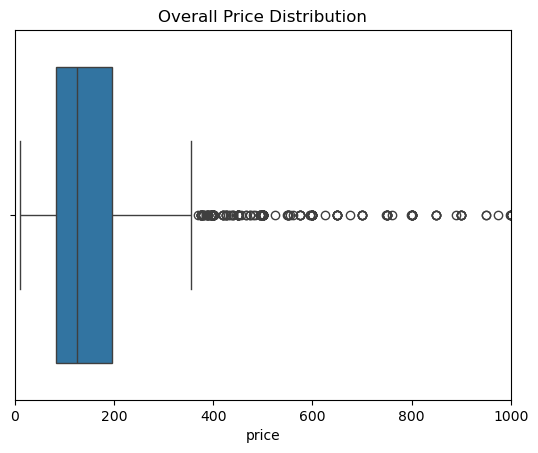

In [124]:
#price distribution 
sns.boxplot(x='price',data=df)
plt.xlim(0,df['price'].quantile(0.99))
plt.title('Overall Price Distribution')
plt.show()

In [88]:
#descriptive stats 
print(df['price'].mean(),
      df['reviews_per_month'].median())

177.09552388097023 0.42


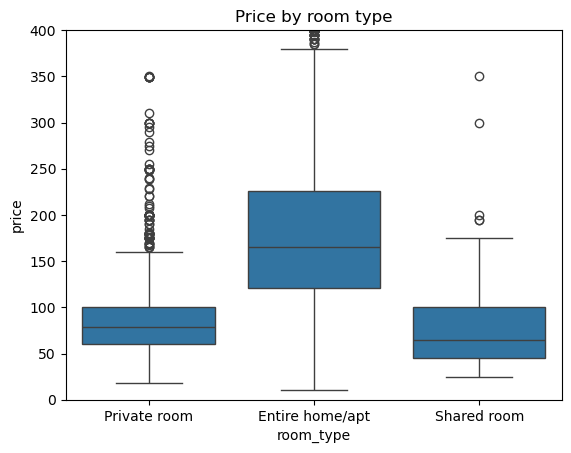

In [120]:
#room type vs price 
sns.boxplot(x='room_type',y='price',data=df)
plt.ylim(0,df['price'].quantile(0.95))
plt.title("Price by room type")
plt.show()

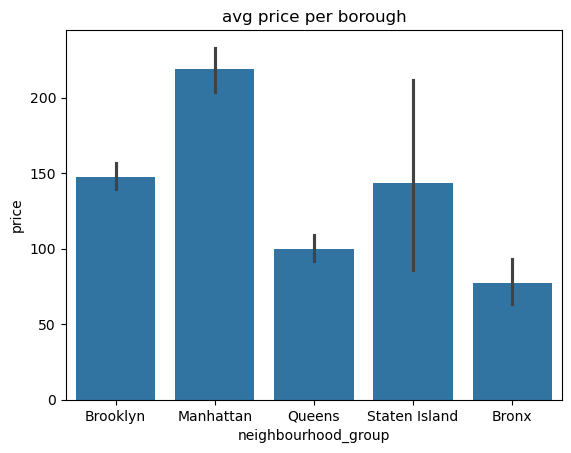

In [102]:
#price vs borough
sns.barplot(x='neighbourhood_group',y='price',data=df)
plt.title('avg price per borough')
plt.show()

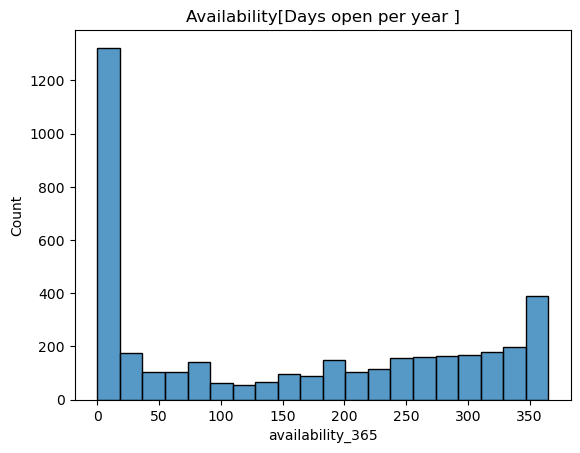

In [112]:
#AVAILABILITY INSIGHTS
sns.histplot(df['availability_365'],bins=20)
plt.title("Availability[Days open per year ]")
plt.show()

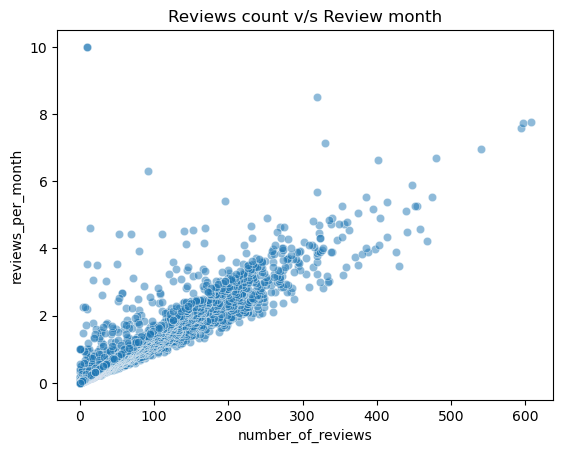

In [114]:
#review analysis 
sns.scatterplot(x='number_of_reviews',y='reviews_per_month',alpha=0.5,data=df)
plt.title("Reviews count v/s Review month")
plt.show()

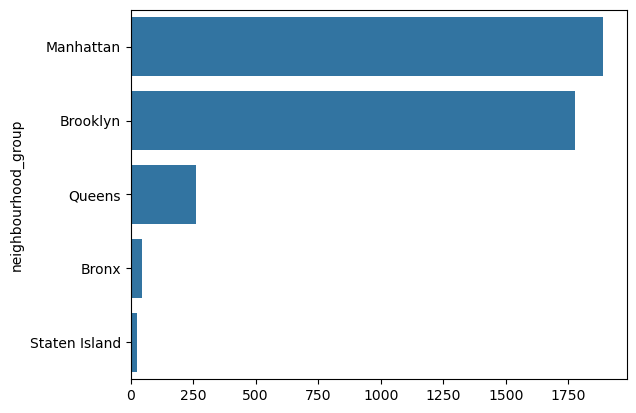

In [53]:
#neighbourhood counts
top_neigh=df['neighbourhood_group'].value_counts().head(10)
sns.barplot(x=top_neigh.values,y=top_neigh.index)
plt.show()